In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)
eth = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

<AxesSubplot:xlabel='Date'>

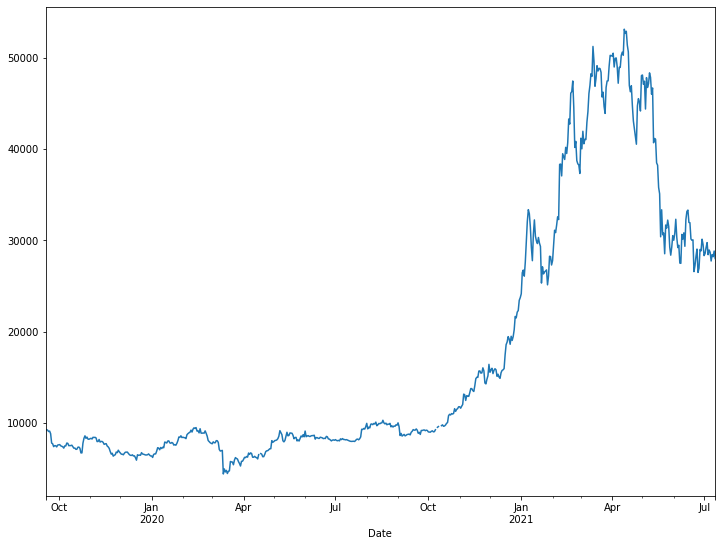

In [3]:
bitcoin['Close'].plot(figsize=(12, 9))

<AxesSubplot:xlabel='Date'>

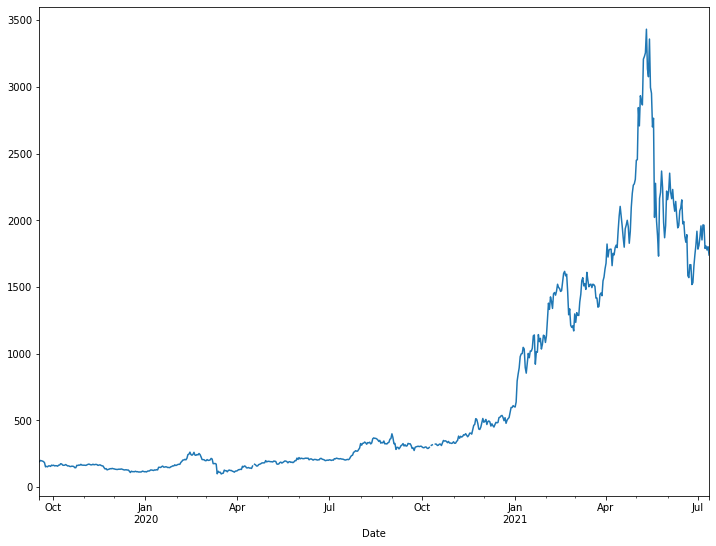

In [4]:
eth['Close'].plot(figsize=(12, 9))

In [5]:
btc_eth = pd.merge(bitcoin, eth, on='Date', how='inner', suffixes=('_btc', '_eth'))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

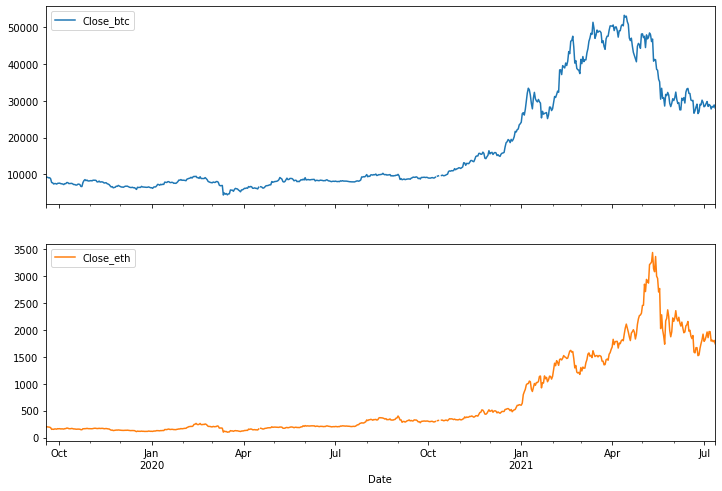

In [6]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12, 8))


C:\Users\Eloi\AppData\Local\Temp/ipykernel_14312/446845556.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2021']['Close'].plot()
C:\Users\Eloi\AppData\Local\Temp/ipykernel_14312/446845556.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2021']['Close'].resample('M').mean().plot(label='Moyenne par mois', lw=3, ls=':', alpha=0.8)
C:\Users\Eloi\AppData\Local\Temp/ipykernel_14312/446845556.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2021']['Close'].r

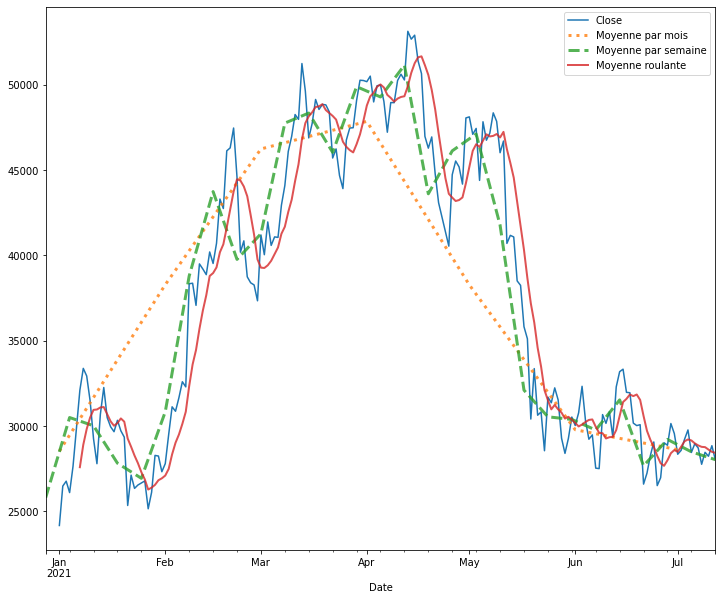

In [7]:
plt.figure(figsize=(12, 10))
bitcoin['2021']['Close'].plot()
bitcoin['2021']['Close'].resample('M').mean().plot(label='Moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin['2021']['Close'].resample('W').mean().plot(label='Moyenne par semaine', lw=3, ls='--', alpha=0.8)
bitcoin['2021']['Close'].rolling(window=7).mean().plot(label='Moyenne roulante', lw=2, alpha=0.8)
plt.legend()

In [8]:
btc_eth[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.899031
Close_eth,0.899031,1.000000


In [9]:
max_min_btc = bitcoin['Close'].rolling(window=28).agg(['max', min])
max_min_btc

,max,min
Date,,
2019-09-18,NaN,NaN
2019-09-19,NaN,NaN
2019-09-20,NaN,NaN
2019-09-21,NaN,NaN
2019-09-22,NaN,NaN
...,...,...
2021-07-08,33325.59375,26502.841797
2021-07-09,33325.59375,26502.841797
2021-07-10,33325.59375,26502.841797


In [10]:
bitcoin['Buy'] = np.zeros(len(bitcoin))
bitcoin['Sell'] = np.zeros(len(bitcoin))

In [11]:
bitcoin.loc[bitcoin['Close'] > max_min_btc['max']['Close'], 'Buy'] = 1
bitcoin.loc[bitcoin['Close'] < max_min_btc['min']['Close'], 'Sell'] = -1


KeyError: 'Close'

In [ ]:
plt.figure(figsize=(13, 11))
bitcoin[['Buy', 'Sell']].plot()
plt.legend()

In [ ]:
data = bitcoin.copy()
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [ ]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

In [ ]:
plt.figure(figsize=(12,8))
bitcoin[['Buy', 'Sell']].plot()
plt.legend()